#  BANK  CUSTOMER CHURN PREDICTION

### Import Required Libraries 

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### DATA VISUALIZATION

In [180]:
bank_data=pd.read_csv('Bank Customer Churn Prediction.csv')
bank_data=pd.DataFrame(bank_data)
bank_data.set_index('customer_id',drop=True,inplace=True)
bank_data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [181]:
corr=bank_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


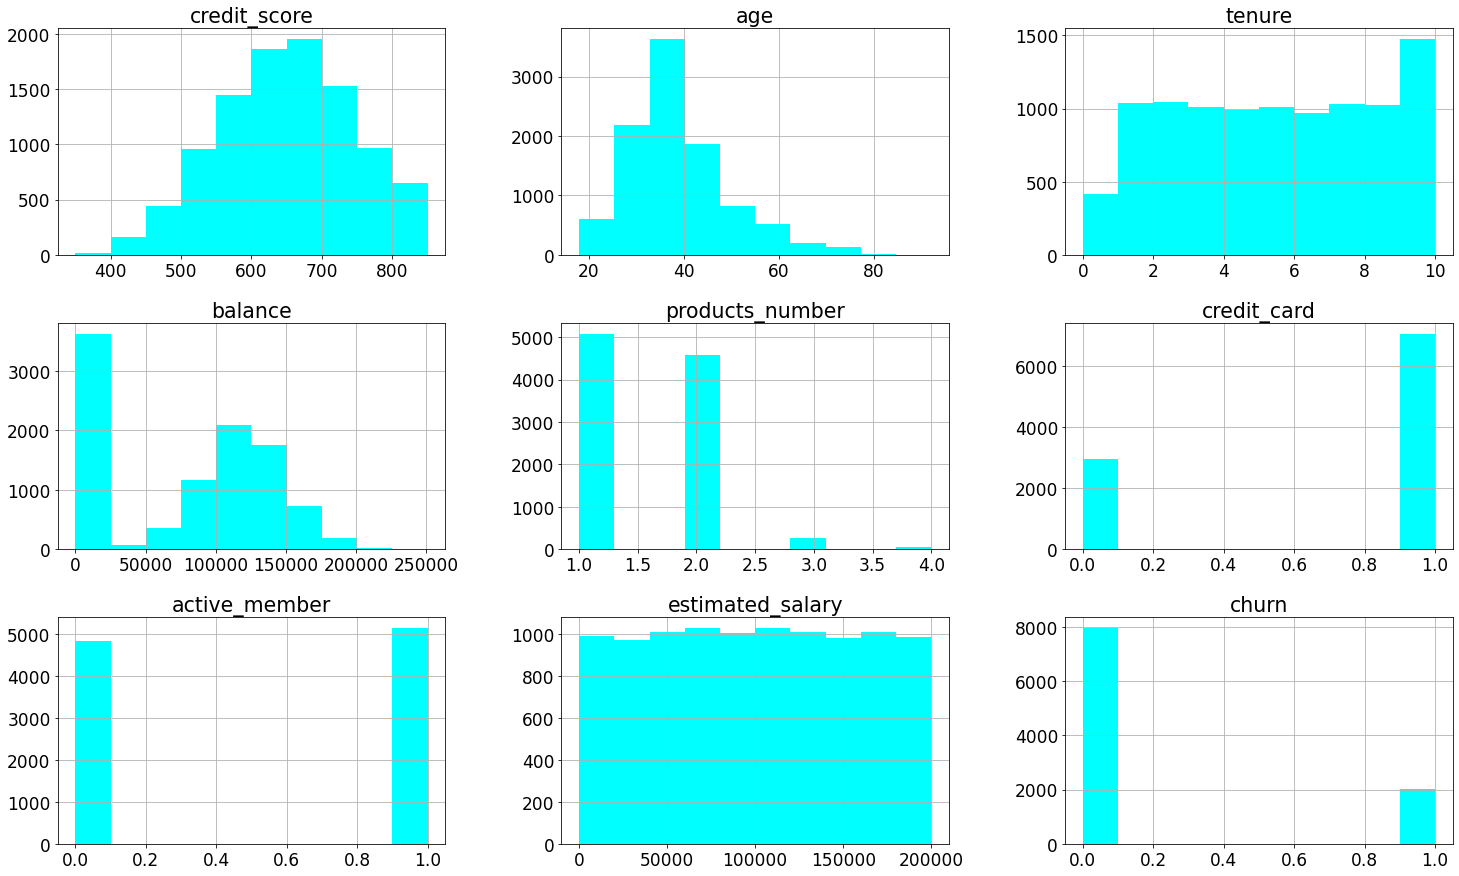

In [182]:
color = '#00FFFF'
bank_data.hist(bins=10,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 17
plt.show()

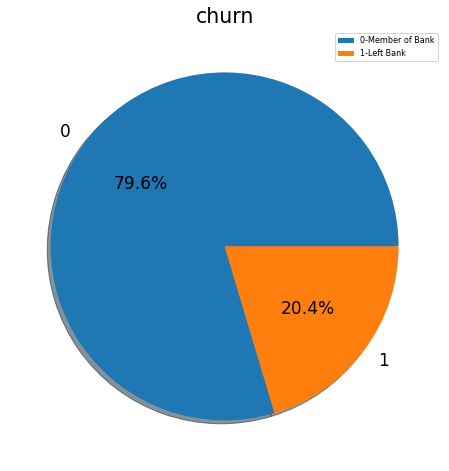

In [183]:
plt.figure(figsize=(12,8))
bank_data['churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True);
plt.title('churn');
plt.ylabel('');
plt.legend(['0-Member of Bank','1-Left Bank'],prop={'size': 8})

In [184]:
conditions = [
    (bank_data['active_member'] == 1) & (bank_data['churn'] == 1)
        ]
values = ['1']
bank_data['return_member']  = np.select(conditions, values)
bank_data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,return_member
customer_id,,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


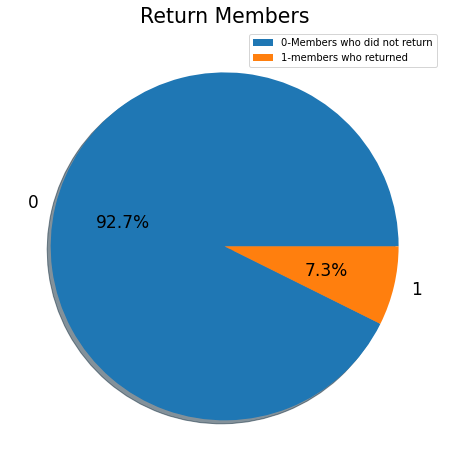

In [185]:
plt.figure(figsize=(10,8))
bank_data['return_member'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True);
plt.title('Return Members');
plt.ylabel('');
plt.legend(['0-Members who did not return','1-members who returned'],prop={'size': 10})

In [186]:
bank_data=pd.read_csv('Bank Customer Churn Prediction.csv')
bank_data=pd.DataFrame(bank_data)
bank_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [187]:
conditions = [
     (bank_data['country'] == 'France'),(bank_data['country'] == 'Spain'),(bank_data['country'] == 'Germany')
     ]
values = ['FRA','ESP','DEU']
bank_data['iso_code']  = np.select(conditions, values)
bank_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,iso_code
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,FRA
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,ESP
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,FRA
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,FRA
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,ESP


In [188]:
map_data1 = bank_data[bank_data['churn']== 1]
map_data = pd.DataFrame()
map_data['count_customers'] = map_data1.groupby('iso_code')['customer_id'].count()
map_data.reset_index(inplace=True,level = ['iso_code'])
print(map_data)

  iso_code  count_customers
0      DEU              814
1      ESP              413
2      FRA              810


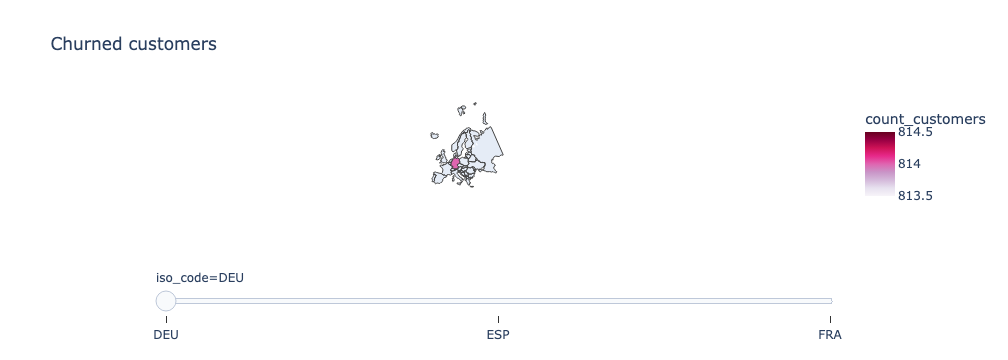

In [189]:
fig = px.choropleth(map_data, locations="iso_code",
                    color="count_customers",
                    hover_name="count_customers",
                    animation_frame="iso_code",
                    scope="europe",
                    title = "Churned customers",                 color_continuous_scale=px.colors.sequential.PuRd)
fig["layout"].pop("updatemenus")
fig.show()

### DATA MANIPULATION AND PLOTS

In [190]:
#Sort the data according to age groups
age_group = [
    (
    (bank_data['age']>0) & (bank_data['age']<20)),((bank_data['age']>=20) & (bank_data['age']<40)),
    ((bank_data['age']>=40) & (bank_data['age']<60)),((bank_data['age']>=60))
        ]

# Create a list of values for age groups
values = ['Teenager','Adult','Middle-Age Adult','Senior Adults']

# create a new column and use np.select to assign values to it using our lists as arguments
bank_data['age group']  = np.select(age_group, values)
bank_data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,iso_code,age group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,FRA,Middle-Age Adult
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,ESP,Middle-Age Adult
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,FRA,Middle-Age Adult
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,FRA,Adult
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,ESP,Middle-Age Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,FRA,Adult
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,FRA,Adult
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,FRA,Adult
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,DEU,Middle-Age Adult


In [191]:
#Display columns 'country', 'gender', 'age','age group' and 'churn' - the columns we are utilizing in this objective

Bank_Demographics_Data = bank_data[['country','gender','age','age group','churn']]
print("The below subset of the original dataset is to be used from here on to analyze Churn with respect to Demographics")

Bank_Demographics_Data

The below subset of the original dataset is to be used from here on to analyze Churn with respect to Demographics


,country,gender,age,age group,churn
0,France,Female,42,Middle-Age Adult,1
1,Spain,Female,41,Middle-Age Adult,0
2,France,Female,42,Middle-Age Adult,1
3,France,Female,39,Adult,0
4,Spain,Female,43,Middle-Age Adult,0
...,...,...,...,...,...
9995,France,Male,39,Adult,0
9996,France,Male,35,Adult,0
9997,France,Female,36,Adult,1
9998,Germany,Male,42,Middle-Age Adult,1


In [192]:
#Checking if the column churn has any null values
Bank_Demographics_Data.isnull().any()

country      False
gender       False
age          False
age group    False
churn        False
dtype: bool

In [193]:
#Print conclusion statement from above result
print("Based on the above result, the column 'churn' has no null values")

Based on the above result, the column 'churn' has no null values


In [194]:
#Churn Vs Country
Churn_Vs_Country = Bank_Demographics_Data.groupby(['country', 'churn'])['churn'].count()
Churn_Vs_Country

country  churn
France   0        4204
         1         810
Germany  0        1695
         1         814
Spain    0        2064
         1         413
Name: churn, dtype: int64

In [195]:
#Churn Vs Gender
Churn_Vs_Gender = Bank_Demographics_Data.groupby(['gender', 'churn'])['churn'].count()
Churn_Vs_Gender

gender  churn
Female  0        3404
        1        1139
Male    0        4559
        1         898
Name: churn, dtype: int64

In [196]:
#Churn Vs Age
Churn_Vs_Age = Bank_Demographics_Data.groupby(['age', 'churn'])['churn'].count()
Churn_Vs_Age

age  churn
18   0        20
     1         2
19   0        26
     1         1
20   0        38
              ..
84   0         1
     1         1
85   0         1
88   0         1
92   0         2
Name: churn, Length: 128, dtype: int64

In [197]:
#Churn Vs Age Groups
Churn_Vs_Age_Group = Bank_Demographics_Data.groupby(['age group', 'churn'])['churn'].count()
Churn_Vs_Age_Group

age group         churn
Adult             0        5344
                  1         594
Middle-Age Adult  0        2194
                  1        1293
Senior Adults     0         379
                  1         147
Teenager          0          46
                  1           3
Name: churn, dtype: int64

In [198]:
#Churn Vs Country and Gender
Churn_Vs_Country_And_Gender = Bank_Demographics_Data.groupby(['country', 'gender', 'churn'])['churn'].count()
Churn_Vs_Country_And_Gender

country  gender  churn
France   Female  0        1801
                 1         460
         Male    0        2403
                 1         350
Germany  Female  0         745
                 1         448
         Male    0         950
                 1         366
Spain    Female  0         858
                 1         231
         Male    0        1206
                 1         182
Name: churn, dtype: int64

In [199]:
#Pivot table of Churn Vs Country and Gender
print("Below is a pivot table representing the distribution of Churn with respect to Country")
Bank_Demographics_Data.pivot_table(index = 'country', columns = 'gender', values = 'churn', aggfunc='sum')

Below is a pivot table representing the distribution of Churn with respect to Country


gender,Female,Male
country,,
France,460,350
Germany,448,366
Spain,231,182


<AxesSubplot:xlabel='Country', ylabel='Churn'>

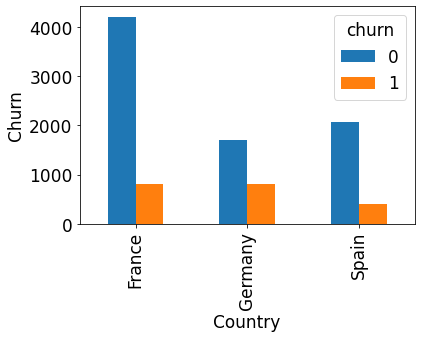

In [200]:
#Plot of Churn Vs Country
Churn_Vs_Country
Churn_Vs_Country.unstack().plot(kind='bar', xlabel = 'Country', ylabel = 'Churn')

<AxesSubplot:xlabel='Gender', ylabel='Churn'>

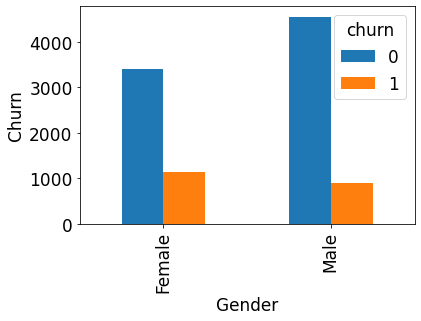

In [201]:
#Plot of Churn Vs Gender
Churn_Vs_Gender
Churn_Vs_Gender.unstack().plot(kind='bar', xlabel = 'Gender', ylabel = 'Churn')

<AxesSubplot:xlabel='Age Group', ylabel='Churn'>

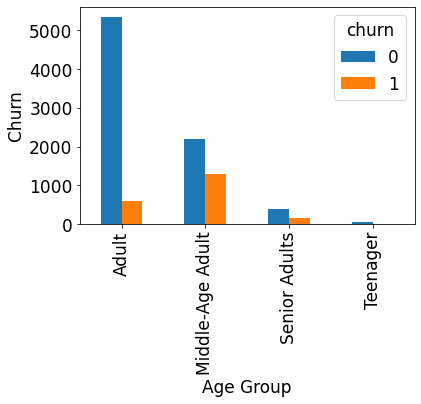

In [202]:
#Plot of Churn Vs Age
Churn_Vs_Age_Group
Churn_Vs_Age_Group.unstack().plot(kind='bar', xlabel = 'Age Group', ylabel = 'Churn')

<AxesSubplot:xlabel='Country and Gender', ylabel='Churn'>

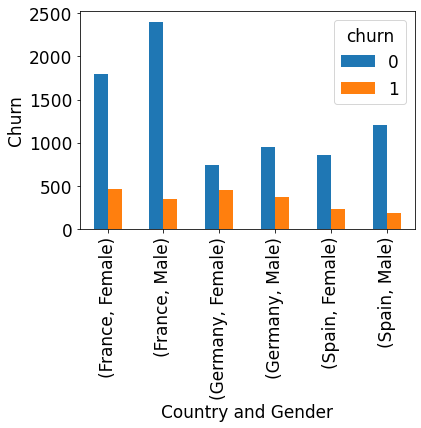

In [203]:
Churn_Vs_Country_And_Gender
Churn_Vs_Country_And_Gender.unstack().plot(kind='bar', xlabel = 'Country and Gender', ylabel = 'Churn')

### DATA CLEANING AND EXPLORATORY DATA ANALYSIS

In [204]:
#Exploratory Analysis
#Importing the data
bank_data = pd.read_csv('Bank Customer Churn Prediction.csv')
#Convert data to Dataframe
bank_data = pd.DataFrame(bank_data)
#View dataframe
bank_data.head(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [205]:
#Exploratory Analysis
#Check the shape of the data
bank_data.shape

(10000, 12)

In [206]:
#Check for any null values
bank_data.isnull().all()

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [207]:
#Find the number of unique values in each column
bank_data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [208]:
#Convert 'gender' and 'country' to categorical 
bank_data['gender_new']=bank_data.gender.map({'Female':0,'Male':1})
bank_data['country_new'] = bank_data.country.map({'France':1,'Spain':2,'Germany':3})

bank_data.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_new,country_new
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,2
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,2


In [209]:
bank_data_new = bank_data.drop(['country','gender'],axis=1)
bank_data_new.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_new,country_new
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,2
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,1
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,2


In [210]:
#Set index as 'customerId'
bank_data_new.set_index('customer_id',drop=True,inplace=True)
bank_data_new.head(2)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_new,country_new
customer_id,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1,0,1
15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,2


In [211]:
#Standardize the data
scaling_cols = ['tenure','balance','estimated_salary']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
bank_data_new[scaling_cols] = scaler.fit_transform(bank_data_new[scaling_cols])
bank_data_new.head(2)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_new,country_new
customer_id,,,,,,,,,,,
15634602,619,42,-1.041760,-1.225848,1,1,1,0.021886,1,0,1
15647311,608,41,-1.387538,0.117350,1,0,1,0.216534,0,0,2


### PREDICTIVE ANALYTICS

In [212]:
#Logistic Regression

y = bank_data_new['churn']
X = bank_data_new.drop(['churn'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

logreg = LogisticRegression(solver='liblinear')

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(X_test)

[[1543   64]
 [ 310   83]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.21      0.31       393

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000

Accuracy: 0.813
             credit_score  age    tenure   balance  products_number  \
customer_id                                                           
15687492              596   32 -0.695982  0.324119                2   
15736963              623   43 -1.387538 -1.225848                2   
15721730              601   44 -0.350204 -1.225848                2   
15762134              506   59  1.032908  0.683816                2   
15648898              560   27  0.687130  0.777477                1   
...                   ...  ...       ...       ...              ...   
15598982              602   53 -0.004426  0.349118            

In [213]:
import statsmodels.formula.api as smf
model1 = smf.logit(
            formula = 'churn~credit_score+age+tenure+balance+products_number+credit_card+active_member+estimated_salary+gender_new+country_new',
            data = bank_data_new)
results=model1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.429503
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.1503
Time:                        23:58:31   Log-Likelihood:                -4295.0
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.6574      0.234    -15.606      0.000      -4.117      -3.198
credit_scor

In [214]:
#Probability of a customer getting churned
#bank_data_new['Probability of getting churned'] = logreg.predict_proba(bank_data_new[X_test.columns])[:,1]

In [215]:
#bank_data_new[['churn','Probability of getting churned']].head(20)

In [216]:
##KNN
from sklearn.neighbors import KNeighborsClassifier

y = bank_data_new['churn']
X = bank_data_new.drop(['churn'],axis=1)

knn_model = KNeighborsClassifier(n_neighbors=5)

X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(X,y,test_size=0.2,random_state=42)

#Fit
knn_model.fit(X_train_knn,y_train_knn)

#predict labels
predicted_y_5 = knn_model.predict(X_test_knn)

#Print confusion matrix & classification report
print(confusion_matrix(y_test_knn,predicted_y_5))
print(classification_report(y_test_knn,predicted_y_5))
print("Accuracy score when k=5", accuracy_score(y_test_knn,predicted_y_5))

[[1492  115]
 [ 284  109]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1607
           1       0.49      0.28      0.35       393

    accuracy                           0.80      2000
   macro avg       0.66      0.60      0.62      2000
weighted avg       0.77      0.80      0.78      2000

Accuracy score when k=5 0.8005


In [217]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

y = bank_data_new['churn']
X = bank_data_new.drop(['churn'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

k_vals = range(1,20)
accuracy_scores = []

for i in k_vals:
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    y_pred_vals = knn1.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test,y_pred_vals))
    
print(accuracy_scores)


[0.7445, 0.7985, 0.7905, 0.798, 0.8005, 0.8095, 0.8065, 0.81, 0.8125, 0.816, 0.814, 0.814, 0.8095, 0.8125, 0.8065, 0.809, 0.8065, 0.8085, 0.8065]


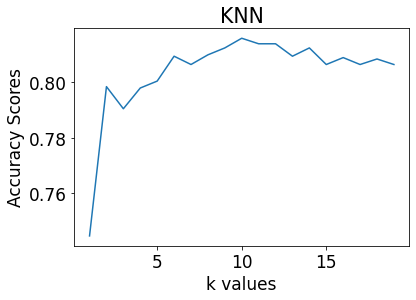

In [218]:
plt.plot(k_vals,accuracy_scores)
plt.xlabel('k values')
plt.ylabel('Accuracy Scores')
plt.title('KNN')
plt.show()

In [219]:
bank_data_new['Churn_Probability_logreg'] = logreg.predict_proba(bank_data_new[X_test.columns])[:,1]
bank_data_new['Churn_Probability_knn'] = knn_model.predict_proba(bank_data_new[X_test_knn.columns])[:,1]

bank_data_new[['churn','Churn_Probability_logreg','Churn_Probability_knn']].head(20)

,churn,Churn_Probability_logreg,Churn_Probability_knn
customer_id,,,
15634602,1,0.118106,0.0
15647311,0,0.195388,0.2
15619304,1,0.345915,0.4
15701354,0,0.213271,0.0
15737888,0,0.195057,0.0
15574012,1,0.300096,0.4
15592531,0,0.084784,0.2
15656148,1,0.287963,1.0
15792365,0,0.121048,0.4


### DECISION TREE

In [220]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Train Decision Tree Classifer
dt = dt.fit(X, y)

#Predict the response for test dataset
y_pred = dt.predict(X)

# print out the accuracy of the classifier using `accuracy_score` function
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.8468


In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [222]:
tree_clf = DecisionTreeClassifier(random_state = 0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [223]:
class_rep = classification_report(y_test,y_pred[:2500]) 

print(class_rep)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1991
           1       0.22      0.07      0.11       509

    accuracy                           0.76      2500
   macro avg       0.51      0.50      0.48      2500
weighted avg       0.68      0.76      0.71      2500



### PRINCIPLE COMPONENT ANALYSIS

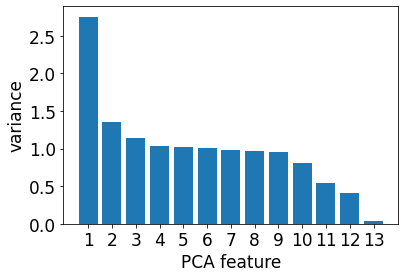

In [224]:
from sklearn.pipeline import make_pipeline
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

samples = bank_data_new.values

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(1, 1 + pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### MOCK DATA PREDICTION

In [225]:
##import mock data
mock_data = pd.read_csv('MOCK_DATA.csv')
mock_data = pd.DataFrame(mock_data)
mock_data.set_index('customer_id',drop=True,inplace=True)
mock_data.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_new,country_new
customer_id,,,,,,,,,,
1,420,42,1,93453.38,3,0,0,98287.28,1,2
2,634,76,8,349258.61,4,0,0,117232.78,1,3
3,712,67,9,136096.88,3,1,0,155467.73,1,3
4,842,78,8,61918.46,2,1,1,275827.82,0,2
5,796,57,3,306212.73,1,0,1,134895.50,0,3


In [226]:
#Standardize the data
cols = ['tenure','balance','estimated_salary']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
mock_data[cols] = scaler.fit_transform(mock_data[cols])
mock_data.head(2)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_new,country_new
customer_id,,,,,,,,,,
1,420,42,-1.573994,-0.831751,3,0,0,-0.851690,1,2
2,634,76,0.861990,1.715164,4,0,0,-0.660701,1,3


In [227]:
##PREDICT
predicted_churn = logreg.predict(mock_data)
#print(predicted_churn)
mock_data['predicted_churn']=predicted_churn
mock_data.head(10)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_new,country_new,predicted_churn
customer_id,,,,,,,,,,,
1,420,42,-1.573994,-0.831751,3,0,0,-0.851690,1,2,0
2,634,76,0.861990,1.715164,4,0,0,-0.660701,1,3,1
3,712,67,1.209988,-0.407173,3,1,0,-0.275257,1,3,1
4,842,78,0.861990,-1.145727,2,1,1,0.938087,0,2,1
5,796,57,-0.877998,1.286579,1,0,1,-0.482644,0,3,1
6,491,42,-0.877998,-0.008866,4,1,0,0.630363,0,3,0
7,411,58,-0.182003,0.501233,3,0,1,0.434174,1,2,0
8,844,89,1.557986,-0.711814,2,0,0,1.148677,0,2,1
9,383,28,1.557986,1.458033,4,1,1,1.192671,1,2,0
